## Eunice Ofori-Addo_964165 

In [1]:
import tensorflow

## Load the data set

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
    
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
train_x = x_train.astype('float32') / 255  # normalization
test_x = x_test.astype('float32') / 255
train_y = to_categorical(y_train)   # create label vectors
test_y = to_categorical(y_test)

170508288/170498071 [==============================] - 16s 0us/step


In [3]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [4]:
from tensorflow.keras import layers 
from tensorflow.keras import models


## Construct an CNN using Keras/Tensorflow

In [6]:
cifar10_model = models.Sequential()
cifar10_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cifar10_model.add(layers.MaxPooling2D((2, 2)))
cifar10_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cifar10_model.add(layers.MaxPooling2D((2, 2)))
cifar10_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

cifar10_model.add(layers.Flatten())
cifar10_model.add(layers.Dense(64, activation='relu'))
cifar10_model.add(layers.Dense(10, activation='softmax'))

In [7]:
## Model Summary

cifar10_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

## Compile, train, and test your model

In [9]:
## Compile model

cifar10_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [10]:
## Train and Test Model

history = cifar10_model.fit(
    train_x,
    train_y,
    batch_size = 64,
    epochs = 10,
    validation_data = (test_x, test_y)
)

Epoch 1/10
782/782 [==============================] - 29s 37ms/step - loss: 1.5415 - accuracy: 0.4317 - val_loss: 1.2940 - val_accuracy: 0.5328
Epoch 2/10
782/782 [==============================] - 33s 42ms/step - loss: 1.1732 - accuracy: 0.5852 - val_loss: 1.0674 - val_accuracy: 0.6162
Epoch 3/10
782/782 [==============================] - 35s 44ms/step - loss: 1.0264 - accuracy: 0.6417 - val_loss: 1.0632 - val_accuracy: 0.6226
Epoch 4/10
782/782 [==============================] - 33s 42ms/step - loss: 0.9284 - accuracy: 0.6738 - val_loss: 0.9843 - val_accuracy: 0.6572
Epoch 5/10
782/782 [==============================] - 35s 45ms/step - loss: 0.8542 - accuracy: 0.7026 - val_loss: 0.9001 - val_accuracy: 0.6852
Epoch 6/10
782/782 [==============================] - 34s 43ms/step - loss: 0.7975 - accuracy: 0.7233 - val_loss: 0.9332 - val_accuracy: 0.6818
Epoch 7/10
782/782 [==============================] - 34s 44ms/step - loss: 0.7489 - accuracy: 0.7398 - val_loss: 0.8713 - val_accuracy:

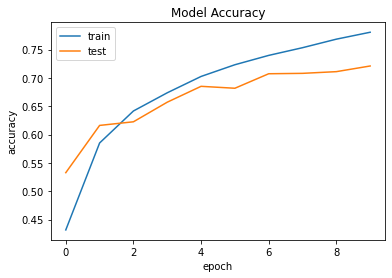

In [11]:
## Plotting learning curve
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

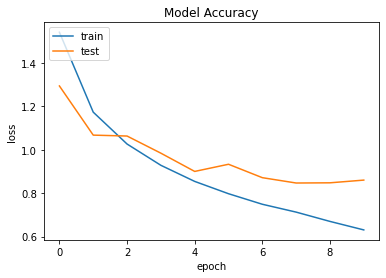

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

## Save model

In [13]:
## Save your trained model

cifar10_model.save('keras_CNN_CIFAR10.model')

2022-03-25 16:32:46.678755: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: keras_CNN_CIFAR10.model/assets
